In [96]:
from incense import ExperimentLoader
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [86]:
E = ExperimentLoader(mongo_uri='mongodb://localhost', db_name='chai')

In [87]:
exps = E.find_all()
exps = list(filter(lambda e: e.to_dict()['status'] == 'COMPLETED', exps))

In [88]:
def exp_data(exp):
    exp_data = {'time_sacred': (exp.to_dict()['stop_time'] - exp.to_dict()['start_time']).total_seconds(),
                'time_tune': exp.metrics['time_total_s'].iloc[-1],
                'num_workers': exp.to_dict()['config']['num_workers'],
                'train_batch_size': exp.to_dict()['config']['train_batch_size'],
                'episode_len_mean': np.mean(exp.metrics['episode_len_mean']),
                'timesteps_total': exp.metrics['timesteps_total'].iloc[-1],
                'sample_time_ms': np.mean(exp.metrics['timers/sample_time_ms']),
                'sample_throughput': np.mean(exp.metrics['timers/sample_throughput'])}
    return exp_data

In [89]:
exps = [exp_data(exp) for exp in exps]

In [92]:
df = pd.DataFrame(exps)
df.columns

Index(['time_sacred', 'time_tune', 'num_workers', 'train_batch_size',
       'episode_len_mean', 'timesteps_total', 'sample_time_ms',
       'sample_throughput'],
      dtype='object')

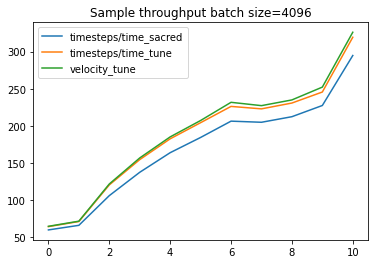

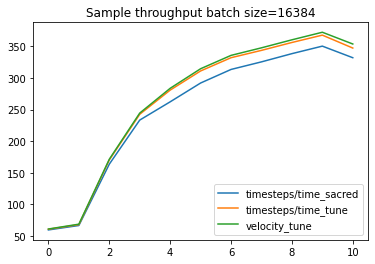

In [107]:
for bs, df_ in df.groupby('train_batch_size'):
    plt.figure()
    plt.title(f"Sample throughput batch size={bs}")
    plt.plot(df_['num_workers'], df_['timesteps_total'] / df_['time_sacred'], label=f"timesteps/time_sacred")
    plt.plot(df_['num_workers'], df_['timesteps_total'] / df_['time_tune'], label=f"timesteps/time_tune")
    plt.plot(df_['num_workers'], df_['sample_throughput'], label=f"velocity_tune")
    
    plt.legend()
    plt.show()

In [109]:
df['timesteps_total'] / 11

0      4096.000000
1      4096.000000
2      4096.000000
3      6144.090909
4      8192.090909
5     10240.090909
6     12288.000000
7     14336.000000
8     16384.000000
9     18432.000000
10    20480.181818
11    16384.181818
12    16384.090909
13    16384.090909
14    24576.000000
15    16384.090909
16    20480.090909
17    24576.000000
18    28672.272727
19    32768.181818
20    36864.181818
21    40960.181818
Name: timesteps_total, dtype: float64

In [111]:
exp.metrics['info/num_steps_trained']

step
1      4096
2      8192
3     12288
4     16384
5     20480
6     24576
7     28672
8     32768
9     36864
10    40960
11    45056
Name: info/num_steps_trained, dtype: int64